## Real-time selective sequencing using nanopore technology. Figures and Analysis

### Introduction

This jupyter notebook requires the R kernel. 

Each figure from the manuscript "Real-time seletive sequencing using nanopore technology" is reproduced in this notebook. Figures are presented by panel and in the order in which they are considered in the manuscript.

In [2]:
library(ggplot2)
library("gridExtra")
library("plyr")

### Figure 3 - Balancing Sequencing of Amplicons

These figures take as input bam files generated at 1 minute intervals from reads generated during the run.

In [2]:
CONT_Template = read.csv("data/fig4/NO_RU/NO_RU_Template.txt_in_50_windows.txt", header = FALSE,sep="\t")
CONT_Complement = read.csv("data/fig4/NO_RU/NO_RU_Complement.txt_in_50_windows.txt", header = FALSE,sep="\t")
CONT_2D = read.csv("data/fig4/NO_RU/NO_RU_2D.txt_in_50_windows.txt", header = FALSE,sep="\t")
BAL_Template = read.csv("data/fig4/200/200_Template.txt_in_50_windows.txt", header = FALSE,sep="\t")
BAL_Complement = read.csv("data/fig4/200/200_Complement.txt_in_50_windows.txt", header = FALSE,sep="\t")
BAL_2D = read.csv("data/fig4/200/200_2D.txt_in_50_windows.txt", header = FALSE,sep="\t")



In [3]:
CONT_Template <-cbind(CONT_Template,Type="Template")
CONT_Complement <-cbind(CONT_Complement,Type="Complement")
CONT_2D <-cbind(CONT_2D,Type="2d")
CONT<-rbind(CONT_2D,CONT_Complement,CONT_Template)
colnames(CONT) <- c("Ref", "Position","Depth","Type")
CONT<-cbind(CONT,Experiment="Library Control")

BAL_Template <-cbind(BAL_Template,Type="Template")
BAL_Complement <-cbind(BAL_Complement,Type="Complement")
BAL_2D <-cbind(BAL_2D,Type="2d")
BAL<-rbind(BAL_2D,BAL_Complement,BAL_Template)
colnames(BAL) <- c("Ref", "Position","Depth","Type")
BAL<-cbind(BAL,Experiment="Normalised")

AmpliconsNormalised <-rbind(CONT,BAL)

Warning message:
: Removed 79356 rows containing missing values (geom_path).

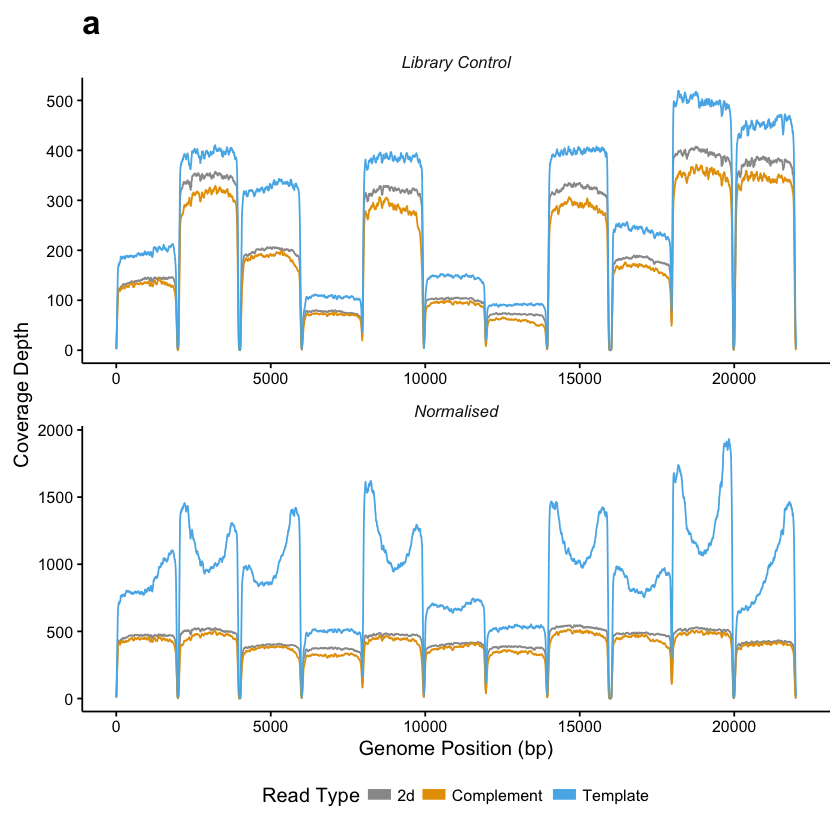

In [11]:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
#ggplot(data=Amplicons,aes(x=Position,y=Depth,color=Type)) + theme_classic()  + geom_line(size=0.5)+ labs(x = "Genome Position (bp)")+labs(y="Coverage Depth")   + xlim(0,22000) + facet_wrap(~Label,ncol=1,scales="free") + scale_colour_manual(name  = "Read Type",values=cbPalette) + theme(legend.position="bottom" , legend.key = element_blank() ) +theme(strip.background = element_blank(),strip.text.x = element_text(angle = 0, hjust = 0,face="bold",size=20)) + guides(colour = guide_legend(override.aes = list(size=3)))
ggplot(data=AmpliconsNormalised,aes(x=Position,y=Depth,color=Type)) + theme_classic()  + geom_line(size=0.5)+ labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "a")   + xlim(0,22000) + facet_wrap(~Experiment,ncol=1,scales="free") + scale_colour_manual(name  = "Read Type",values=cbPalette) + theme(legend.position="bottom" , legend.key = element_blank() ,strip.background = element_blank(),strip.text.x = element_text(angle = 0, face="italic",size=10), plot.title = element_text(angle = 0,hjust = 0, face="bold",size=20)) + guides(colour = guide_legend(override.aes = list(size=3)))

In [27]:
mergedatatemplate <- read.csv('data/fig4/template/minion_PLSP57501_default_sample_idmerge.txt', header=FALSE,sep='\t')
mergedatatemplatenorm <- read.csv('data/fig4/template/minion_PLSP57501_lambda_200xRUmerge.txt', header=FALSE,sep='\t')
mergedata2d <- read.csv('data/fig4/minion_PLSP57501_default_sample_idmerge.txt', header = FALSE ,sep='\t')
mergedata2dnorm <- read.csv('data/fig4/minion_PLSP57501_lambda_200xRUmerge.txt', header = FALSE, sep='\t')

mergedatacomplement <- read.csv('data/fig4/complement/minion_PLSP57501_default_sample_idmerge.txt', header=FALSE,sep='\t')
mergedatacomplementnorm <- read.csv('data/fig4/complement/minion_PLSP57501_lambda_200xRUmerge.txt', header=FALSE,sep='\t')


In [28]:
amplicontemplatenorm1 <- ddply(mergedatatemplatenorm[(mergedatatemplatenorm$V2>=52 & mergedatatemplatenorm$V2<=1980),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=1, Treatment="Read Until")
amplicontemplatenorm2 <- ddply(mergedatatemplatenorm[(mergedatatemplatenorm$V2>=2065 & mergedatatemplatenorm$V2<=3965),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=2, Treatment="Read Until")
amplicontemplatenorm3 <- ddply(mergedatatemplatenorm[(mergedatatemplatenorm$V2>=4070 & mergedatatemplatenorm$V2<=5989),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=3, Treatment="Read Until")
amplicontemplatenorm4 <- ddply(mergedatatemplatenorm[(mergedatatemplatenorm$V2>=6059 & mergedatatemplatenorm$V2<=7981),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=4, Treatment="Read Until")
amplicontemplatenorm5 <- ddply(mergedatatemplatenorm[(mergedatatemplatenorm$V2>=8012 & mergedatatemplatenorm$V2<=9947),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=5, Treatment="Read Until")
amplicontemplatenorm6 <- ddply(mergedatatemplatenorm[(mergedatatemplatenorm$V2>=10008 & mergedatatemplatenorm$V2<=11963),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=6, Treatment="Read Until")
amplicontemplatenorm7 <- ddply(mergedatatemplatenorm[(mergedatatemplatenorm$V2>=12006 & mergedatatemplatenorm$V2<=13941),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=7, Treatment="Read Until")
amplicontemplatenorm8 <- ddply(mergedatatemplatenorm[(mergedatatemplatenorm$V2>=14011 & mergedatatemplatenorm$V2<=15945),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=8, Treatment="Read Until")
amplicontemplatenorm9 <- ddply(mergedatatemplatenorm[(mergedatatemplatenorm$V2>=16076 & mergedatatemplatenorm$V2<=17987),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=9, Treatment="Read Until")
amplicontemplatenorm10 <- ddply(mergedatatemplatenorm[(mergedatatemplatenorm$V2>=18022 & mergedatatemplatenorm$V2<=19972),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=10, Treatment="Read Until")
amplicontemplatenorm11 <- ddply(mergedatatemplatenorm[(mergedatatemplatenorm$V2>=20053 & mergedatatemplatenorm$V2<=21979),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=11, Treatment="Read Until")


amplicontemplate1 <- ddply(mergedatatemplate[(mergedatatemplate$V2>=52 & mergedatatemplate$V2<=1980),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=1, Treatment="Normal")
amplicontemplate2 <- ddply(mergedatatemplate[(mergedatatemplate$V2>=2065 & mergedatatemplate$V2<=3965),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=2, Treatment="Normal")
amplicontemplate3 <- ddply(mergedatatemplate[(mergedatatemplate$V2>=4070 & mergedatatemplate$V2<=5989),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=3, Treatment="Normal")
amplicontemplate4 <- ddply(mergedatatemplate[(mergedatatemplate$V2>=6059 & mergedatatemplate$V2<=7981),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=4, Treatment="Normal")
amplicontemplate5 <- ddply(mergedatatemplate[(mergedatatemplate$V2>=8012 & mergedatatemplate$V2<=9947),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=5, Treatment="Normal")
amplicontemplate6 <- ddply(mergedatatemplate[(mergedatatemplate$V2>=10008 & mergedatatemplate$V2<=11963),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=6, Treatment="Normal")
amplicontemplate7 <- ddply(mergedatatemplate[(mergedatatemplate$V2>=12006 & mergedatatemplate$V2<=13941),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=7, Treatment="Normal")
amplicontemplate8 <- ddply(mergedatatemplate[(mergedatatemplate$V2>=14011 & mergedatatemplate$V2<=15945),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=8, Treatment="Normal")
amplicontemplate9 <- ddply(mergedatatemplate[(mergedatatemplate$V2>=16076 & mergedatatemplate$V2<=17987),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=9, Treatment="Normal")
amplicontemplate10 <- ddply(mergedatatemplate[(mergedatatemplate$V2>=18022 & mergedatatemplate$V2<=19972),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=10, Treatment="Normal")
amplicontemplate11 <- ddply(mergedatatemplate[(mergedatatemplate$V2>=20053 & mergedatatemplate$V2<=21979),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=11, Treatment="Normal")

ampliconcomplementnorm1 <- ddply(mergedatacomplementnorm[(mergedatacomplementnorm$V2>=52 & mergedatacomplementnorm$V2<=1980),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=1, Treatment="Read Until")
ampliconcomplementnorm2 <- ddply(mergedatacomplementnorm[(mergedatacomplementnorm$V2>=2065 & mergedatacomplementnorm$V2<=3965),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=2, Treatment="Read Until")
ampliconcomplementnorm3 <- ddply(mergedatacomplementnorm[(mergedatacomplementnorm$V2>=4070 & mergedatacomplementnorm$V2<=5989),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=3, Treatment="Read Until")
ampliconcomplementnorm4 <- ddply(mergedatacomplementnorm[(mergedatacomplementnorm$V2>=6059 & mergedatacomplementnorm$V2<=7981),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=4, Treatment="Read Until")
ampliconcomplementnorm5 <- ddply(mergedatacomplementnorm[(mergedatacomplementnorm$V2>=8012 & mergedatacomplementnorm$V2<=9947),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=5, Treatment="Read Until")
ampliconcomplementnorm6 <- ddply(mergedatacomplementnorm[(mergedatacomplementnorm$V2>=10008 & mergedatacomplementnorm$V2<=11963),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=6, Treatment="Read Until")
ampliconcomplementnorm7 <- ddply(mergedatacomplementnorm[(mergedatacomplementnorm$V2>=12006 & mergedatacomplementnorm$V2<=13941),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=7, Treatment="Read Until")
ampliconcomplementnorm8 <- ddply(mergedatacomplementnorm[(mergedatacomplementnorm$V2>=14011 & mergedatacomplementnorm$V2<=15945),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=8, Treatment="Read Until")
ampliconcomplementnorm9 <- ddply(mergedatacomplementnorm[(mergedatacomplementnorm$V2>=16076 & mergedatacomplementnorm$V2<=17987),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=9, Treatment="Read Until")
ampliconcomplementnorm10 <- ddply(mergedatacomplementnorm[(mergedatacomplementnorm$V2>=18022 & mergedatacomplementnorm$V2<=19972),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=10, Treatment="Read Until")
ampliconcomplementnorm11 <- ddply(mergedatacomplementnorm[(mergedatacomplementnorm$V2>=20053 & mergedatacomplementnorm$V2<=21979),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=11, Treatment="Read Until")


ampliconcomplement1 <- ddply(mergedatacomplement[(mergedatacomplement$V2>=52 & mergedatacomplement$V2<=1980),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=1, Treatment="Normal")
ampliconcomplement2 <- ddply(mergedatacomplement[(mergedatacomplement$V2>=2065 & mergedatacomplement$V2<=3965),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=2, Treatment="Normal")
ampliconcomplement3 <- ddply(mergedatacomplement[(mergedatacomplement$V2>=4070 & mergedatacomplement$V2<=5989),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=3, Treatment="Normal")
ampliconcomplement4 <- ddply(mergedatacomplement[(mergedatacomplement$V2>=6059 & mergedatacomplement$V2<=7981),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=4, Treatment="Normal")
ampliconcomplement5 <- ddply(mergedatacomplement[(mergedatacomplement$V2>=8012 & mergedatacomplement$V2<=9947),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=5, Treatment="Normal")
ampliconcomplement6 <- ddply(mergedatacomplement[(mergedatacomplement$V2>=10008 & mergedatacomplement$V2<=11963),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=6, Treatment="Normal")
ampliconcomplement7 <- ddply(mergedatacomplement[(mergedatacomplement$V2>=12006 & mergedatacomplement$V2<=13941),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=7, Treatment="Normal")
ampliconcomplement8 <- ddply(mergedatacomplement[(mergedatacomplement$V2>=14011 & mergedatacomplement$V2<=15945),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=8, Treatment="Normal")
ampliconcomplement9 <- ddply(mergedatacomplement[(mergedatacomplement$V2>=16076 & mergedatacomplement$V2<=17987),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=9, Treatment="Normal")
ampliconcomplement10 <- ddply(mergedatacomplement[(mergedatacomplement$V2>=18022 & mergedatacomplement$V2<=19972),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=10, Treatment="Normal")
ampliconcomplement11 <- ddply(mergedatacomplement[(mergedatacomplement$V2>=20053 & mergedatacomplement$V2<=21979),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=11, Treatment="Normal")

amplicon2dnorm1 <- ddply(mergedata2dnorm[(mergedata2dnorm$V2>=52 & mergedata2dnorm$V2<=1980),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=1, Treatment="Read Until")
amplicon2dnorm2 <- ddply(mergedata2dnorm[(mergedata2dnorm$V2>=2065 & mergedata2dnorm$V2<=3965),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=2, Treatment="Read Until")
amplicon2dnorm3 <- ddply(mergedata2dnorm[(mergedata2dnorm$V2>=4070 & mergedata2dnorm$V2<=5989),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=3, Treatment="Read Until")
amplicon2dnorm4 <- ddply(mergedata2dnorm[(mergedata2dnorm$V2>=6059 & mergedata2dnorm$V2<=7981),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=4, Treatment="Read Until")
amplicon2dnorm5 <- ddply(mergedata2dnorm[(mergedata2dnorm$V2>=8012 & mergedata2dnorm$V2<=9947),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=5, Treatment="Read Until")
amplicon2dnorm6 <- ddply(mergedata2dnorm[(mergedata2dnorm$V2>=10008 & mergedata2dnorm$V2<=11963),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=6, Treatment="Read Until")
amplicon2dnorm7 <- ddply(mergedata2dnorm[(mergedata2dnorm$V2>=12006 & mergedata2dnorm$V2<=13941),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=7, Treatment="Read Until")
amplicon2dnorm8 <- ddply(mergedata2dnorm[(mergedata2dnorm$V2>=14011 & mergedata2dnorm$V2<=15945),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=8, Treatment="Read Until")
amplicon2dnorm9 <- ddply(mergedata2dnorm[(mergedata2dnorm$V2>=16076 & mergedata2dnorm$V2<=17987),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=9, Treatment="Read Until")
amplicon2dnorm10 <- ddply(mergedata2dnorm[(mergedata2dnorm$V2>=18022 & mergedata2dnorm$V2<=19972),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=10, Treatment="Read Until")
amplicon2dnorm11 <- ddply(mergedata2dnorm[(mergedata2dnorm$V2>=20053 & mergedata2dnorm$V2<=21979),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=11, Treatment="Read Until")


amplicon2d1 <- ddply(mergedata2d[(mergedata2d$V2>=52 & mergedata2d$V2<=1980),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=1, Treatment="Normal")
amplicon2d2 <- ddply(mergedata2d[(mergedata2d$V2>=2065 & mergedata2d$V2<=3965),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=2, Treatment="Normal")
amplicon2d3 <- ddply(mergedata2d[(mergedata2d$V2>=4070 & mergedata2d$V2<=5989),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=3, Treatment="Normal")
amplicon2d4 <- ddply(mergedata2d[(mergedata2d$V2>=6059 & mergedata2d$V2<=7981),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=4, Treatment="Normal")
amplicon2d5 <- ddply(mergedata2d[(mergedata2d$V2>=8012 & mergedata2d$V2<=9947),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=5, Treatment="Normal")
amplicon2d6 <- ddply(mergedata2d[(mergedata2d$V2>=10008 & mergedata2d$V2<=11963),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=6, Treatment="Normal")
amplicon2d7 <- ddply(mergedata2d[(mergedata2d$V2>=12006 & mergedata2d$V2<=13941),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=7, Treatment="Normal")
amplicon2d8 <- ddply(mergedata2d[(mergedata2d$V2>=14011 & mergedata2d$V2<=15945),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=8, Treatment="Normal")
amplicon2d9 <- ddply(mergedata2d[(mergedata2d$V2>=16076 & mergedata2d$V2<=17987),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=9, Treatment="Normal")
amplicon2d10 <- ddply(mergedata2d[(mergedata2d$V2>=18022 & mergedata2d$V2<=19972),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=10, Treatment="Normal")
amplicon2d11 <- ddply(mergedata2d[(mergedata2d$V2>=20053 & mergedata2d$V2<=21979),], .(V4),summarize, MeanCoverage=mean(V3),MaxCoverage=max(V3),amplicon=11, Treatment="Normal")



ampliconstemplate <- rbind(amplicontemplate1,amplicontemplate2,amplicontemplate3,amplicontemplate4,amplicontemplate5,amplicontemplate6,amplicontemplate7,amplicontemplate8,amplicontemplate9,amplicontemplate10,amplicontemplate11,amplicontemplatenorm1,amplicontemplatenorm2,amplicontemplatenorm3,amplicontemplatenorm4,amplicontemplatenorm5,amplicontemplatenorm6,amplicontemplatenorm7,amplicontemplatenorm8,amplicontemplatenorm9,amplicontemplatenorm10,amplicontemplatenorm11)
ampliconscomplement <- rbind(ampliconcomplement1,ampliconcomplement2,ampliconcomplement3,ampliconcomplement4,ampliconcomplement5,ampliconcomplement6,ampliconcomplement7,ampliconcomplement8,ampliconcomplement9,ampliconcomplement10,ampliconcomplement11,ampliconcomplementnorm1,ampliconcomplementnorm2,ampliconcomplementnorm3,ampliconcomplementnorm4,ampliconcomplementnorm5,ampliconcomplementnorm6,ampliconcomplementnorm7,ampliconcomplementnorm8,ampliconcomplementnorm9,ampliconcomplementnorm10,ampliconcomplementnorm11)
amplicons2d <- rbind(amplicon2d1,amplicon2d2,amplicon2d3,amplicon2d4,amplicon2d5,amplicon2d6,amplicon2d7,amplicon2d8,amplicon2d9,amplicon2d10,amplicon2d11,amplicon2dnorm1,amplicon2dnorm2,amplicon2dnorm3,amplicon2dnorm4,amplicon2dnorm5,amplicon2dnorm6,amplicon2dnorm7,amplicon2dnorm8,amplicon2dnorm9,amplicon2dnorm10,amplicon2dnorm11)

ampliconstemplate <- cbind(ampliconstemplate, Type="Template")
ampliconscomplement <- cbind(ampliconscomplement, Type="Complement")
amplicons2d <- cbind(amplicons2d, Type="2d")
ampliconstype <- rbind(amplicons2d,ampliconstemplate,ampliconscomplement)

In [31]:
MaxVals <- data.frame()


for(i in 1:11)
{
    ##Max Coverage
    selamp=i
    nam <- paste("P", i, sep = "")
    nam2 <- paste("M", i , sep="")
    #assign(nam, ggplot(data=ampliconstype[ampliconstype$amplicon==selamp,], aes(x=V4, y=MaxCoverage, group=interaction(amplicon,Treatment,Type), color=Treatment, shape=Type)) + geom_point()  + stat_smooth(data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,],method="lm",fullrange=TRUE) + stat_smooth(data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="Template" & ampliconstype$amplicon==selamp,],method="lm",fullrange=TRUE) + labs(title = paste("Amplicon",strwrap(selamp)), x = "Coverage Depth In 1 Minute Increments", y = "Max Coverage"))
    #assign(nam,  ggplot(data=ampliconstype[ampliconstype$amplicon==selamp,], aes(x=V4, y=MaxCoverage, group=interaction(amplicon,Treatment,Type), color=Treatment, shape=Type)) + geom_point()  + stat_smooth(data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp &ampliconstype$V4<=14,],method="lm",fullrange=TRUE) +labs(title = paste("amplicon",strwrap(selamp)), x = "", y = "") + theme_minimal()  + theme(legend.position="none"))
    assign(nam,  ggplot(data=ampliconstype[ampliconstype$amplicon==selamp & ampliconstype$Type=="2d",], aes(x=V4, y=MaxCoverage, group=interaction(amplicon,Treatment,Type), color=Treatment, shape=Type)) + geom_point()  + stat_smooth(data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp &ampliconstype$V4<=14,],method="lm",fullrange=TRUE) +labs(title = paste("Amplicon",strwrap(selamp)), x = "", y = "") + theme_minimal()  + theme(legend.position="none"))
    assign(nam2,  ggplot(data=ampliconstype[ampliconstype$amplicon==selamp & ampliconstype$Type=="2d",], aes(x=V4, y=MeanCoverage, group=interaction(amplicon,Treatment,Type), color=Treatment, shape=Type)) + geom_point()  + stat_smooth(data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp &ampliconstype$V4<=14,],method="lm",fullrange=TRUE) +labs(title = paste("Amplicon",strwrap(selamp)), x = "", y = "") + theme_minimal()  + theme(legend.position="none"))
    ObservedDepth = tail(ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]$MaxCoverage,1)
    ExpectedDepthMaxRU = summary(lm(MaxCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp & ampliconstype$V4<=14,]) )$coefficients[2] * 48 + summary(lm(MaxCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp & ampliconstype$V4<=14,]) )$coefficients[1]
    ExpectedDepthMeanRU = summary(lm(MeanCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp & ampliconstype$V4<=14,]) )$coefficients[2] * 48 + summary(lm(MeanCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp & ampliconstype$V4<=14,]) )$coefficients[1]
    ExpectedDepthMaxnoRU = summary(lm(MaxCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]) )$coefficients[2] * 48 + summary(lm(MaxCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]) )$coefficients[1]
    ExpectedDepthMeannoRU = summary(lm(MeanCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]) )$coefficients[2] * 48 + summary(lm(MeanCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]) )$coefficients[1]

    ExpectedDepthMaxRU105 = summary(lm(MaxCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp & ampliconstype$V4<=14,]) )$coefficients[2] * 105 + summary(lm(MaxCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp & ampliconstype$V4<=14,]) )$coefficients[1]
    ExpectedDepthMeanRU105 = summary(lm(MeanCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp & ampliconstype$V4<=14,]) )$coefficients[2] * 105 + summary(lm(MeanCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp & ampliconstype$V4<=14,]) )$coefficients[1]
    ExpectedDepthMaxnoRU105 = summary(lm(MaxCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]) )$coefficients[2] * 105 + summary(lm(MaxCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]) )$coefficients[1]
    ExpectedDepthMeannoRU105 = summary(lm(MeanCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]) )$coefficients[2] * 105 + summary(lm(MeanCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]) )$coefficients[1]



    Time2MaxRU = (tail(ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]$MaxCoverage,1)-summary(lm(MaxCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp & ampliconstype$V4<=14,]) )$coefficients[1])/summary(lm(MaxCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp & ampliconstype$V4<=14,]) )$coefficients[2] # Time to reach Max Coverage
    Time2MaxnoRU = (tail(ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]$MaxCoverage,1)-summary(lm(MaxCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]) )$coefficients[1])/summary(lm(MaxCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]) )$coefficients[2] # Time to reach Max Coverage based on no read until
    Time2MeanRU = (tail(ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]$MeanCoverage,1)-summary(lm(MeanCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp & ampliconstype$V4<=14,]) )$coefficients[1])/summary(lm(MeanCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp & ampliconstype$V4<=14,]) )$coefficients[2] # Time to reach Mean Coverage
    Time2MeannoRU = (tail(ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]$MeanCoverage,1)-summary(lm(MeanCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]) )$coefficients[1])/summary(lm(MeanCoverage ~ V4, data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$Type=="2d" & ampliconstype$amplicon==selamp,]) )$coefficients[2] # Time to reach Max Coverage based on no read until
    #print(paste(i,",",ObservedDepth,",",ExpectedDepthMaxRU,",",ExpectedDepthMeanRU,",",ExpectedDepthMaxnoRU,",",ExpectedDepthMeannoRU,",",Time2MaxRU, "'",Time2MaxnoRU, ",",Time2MeanRU,",",Time2MeannoRU))
    MaxVals <- rbind(MaxVals,c(i,ObservedDepth,ExpectedDepthMaxRU,ExpectedDepthMeanRU,ExpectedDepthMaxnoRU,ExpectedDepthMeannoRU,ExpectedDepthMaxRU105,ExpectedDepthMeanRU105,ExpectedDepthMaxnoRU105,ExpectedDepthMeannoRU105,Time2MaxRU,Time2MaxnoRU,Time2MeanRU,Time2MeannoRU))
}
colnames(MaxVals) <- c("i","ObservedDepth","ExpectedDepthMaxRU","ExpectedDepthMeanRU","ExpectedDepthMaxnoRU","ExpectedDepthMeannoRU","ExpectedDepthMaxRU105","ExpectedDepthMeanRU105","ExpectedDepthMaxnoRU105","ExpectedDepthMeannoRU105","Time2MaxRU","Time2MaxnoRU","Time2MeanRU","Time2MeannoRU")


In [33]:
Prediction=subset(MaxVals, select=c(i,ObservedDepth))
Prediction<-cbind(Prediction,Type="Observed Depth With Read Until (48 Minutes)")
colnames(Prediction)<-c("Amplicon","Depth","Type")
TempPrediction=subset(MaxVals,select=c(i,ExpectedDepthMeanRU))
TempPrediction<-cbind(TempPrediction,Type="Expected Depth No Read Until (48 Minutes)")
colnames(TempPrediction)<-c("Amplicon","Depth","Type")
Prediction<-rbind(Prediction,TempPrediction)
TempPrediction=subset(MaxVals,select=c(i,ExpectedDepthMeanRU105))
TempPrediction<-cbind(TempPrediction,Type="Projected Depth No Read Until (105 Minutes)")
colnames(TempPrediction)<-c("Amplicon","Depth","Type")
Prediction<-rbind(Prediction,TempPrediction)
Prediction$Type <- factor(Prediction$Type, levels = c("Observed Depth With Read Until (48 Minutes)","Expected Depth No Read Until (48 Minutes)","Projected Depth No Read Until (105 Minutes)"))

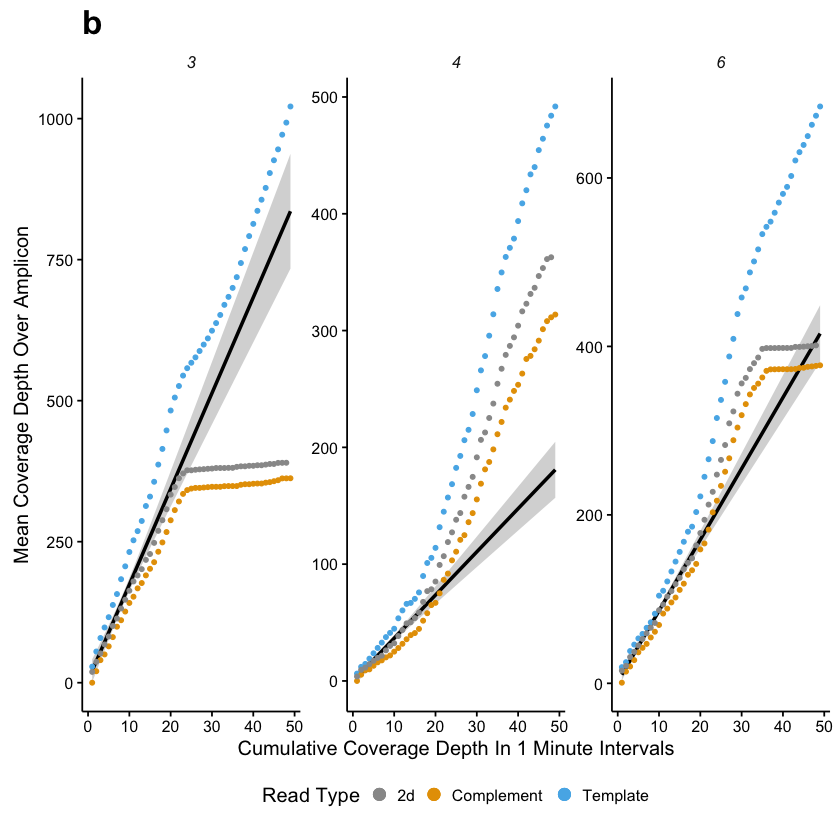

In [16]:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
ggplot(data=ampliconstype[ampliconstype$Treatment=="Read Until"&ampliconstype$amplicon %in% c(3,4,6),], aes(x=V4,y=MeanCoverage,color=Type)) + stat_smooth(data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$V4<=15&ampliconstype$amplicon %in% c(3,4,6),],method="lm",fullrange=TRUE, color="black") + geom_point(data=ampliconstype[ampliconstype$Type=="Template" & ampliconstype$Treatment=="Read Until"&ampliconstype$amplicon %in% c(3,4,6),],size = 1) + geom_point(data=ampliconstype[ampliconstype$Type=="Complement"&ampliconstype$Treatment=="Read Until"&ampliconstype$amplicon %in% c(3,4,6),],size = 1) + geom_point(data=ampliconstype[ampliconstype$Type=="2d"&ampliconstype$Treatment=="Read Until"&ampliconstype$amplicon %in% c(3,4,6),],size = 1) + facet_wrap(~amplicon,scales="free_y") + theme_classic() + labs(title = "b",x = "Cumulative Coverage Depth In 1 Minute Intervals", y = "Mean Coverage Depth Over Amplicon")  + scale_colour_manual(name  = "Read Type",values=cbPalette) + theme(legend.position="bottom" , legend.key = element_blank() ,strip.background = element_blank(),strip.text.x = element_text(angle = 0, face="italic",size=10), plot.title = element_text(angle = 0,hjust = 0, face="bold",size=20)) + guides(colour = guide_legend(override.aes = list(size=3)))

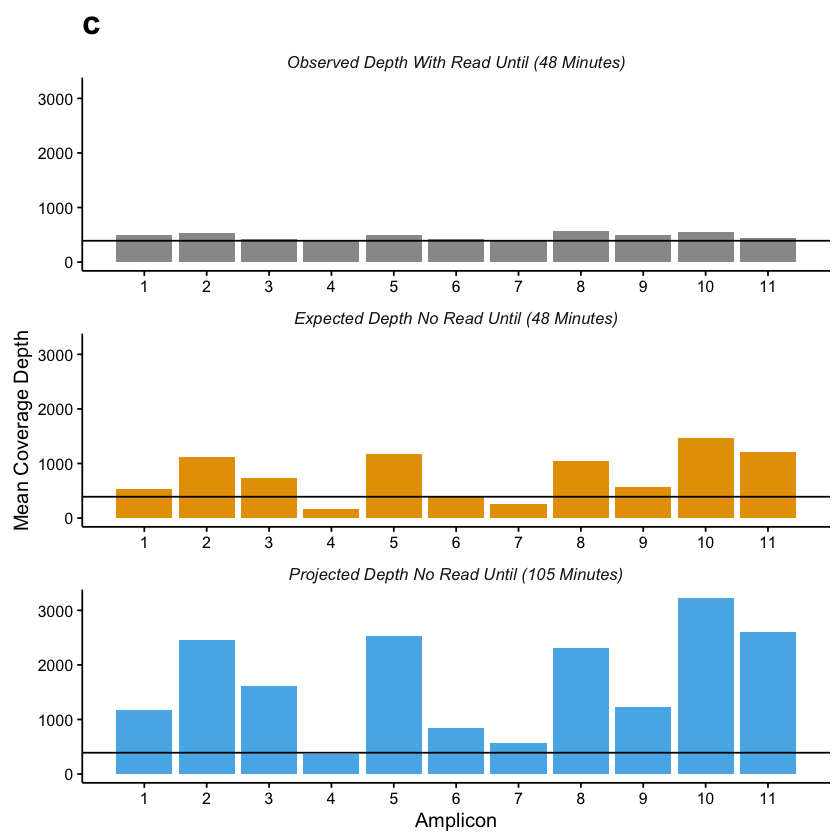

In [26]:
ggplot(data=Prediction,aes(x=Amplicon,y=Depth,fill=Type))+geom_bar(stat="identity",position=position_dodge())+theme_classic()+facet_wrap(~Type,ncol=1,scales="free_x")+ labs(title = "c",x = "Amplicon", y = "Mean Coverage Depth")  +theme(legend.position="none",strip.background = element_blank(),strip.text.x = element_text(angle = 0, face="italic",size=10), plot.title = element_text(angle = 0,hjust = 0, face="bold",size=20)) +scale_x_continuous(breaks = round(seq(min(Prediction$Amplicon), max(Prediction$Amplicon), by = 1),1)) + geom_hline(yintercept=391)+scale_fill_manual(values=cbPalette)

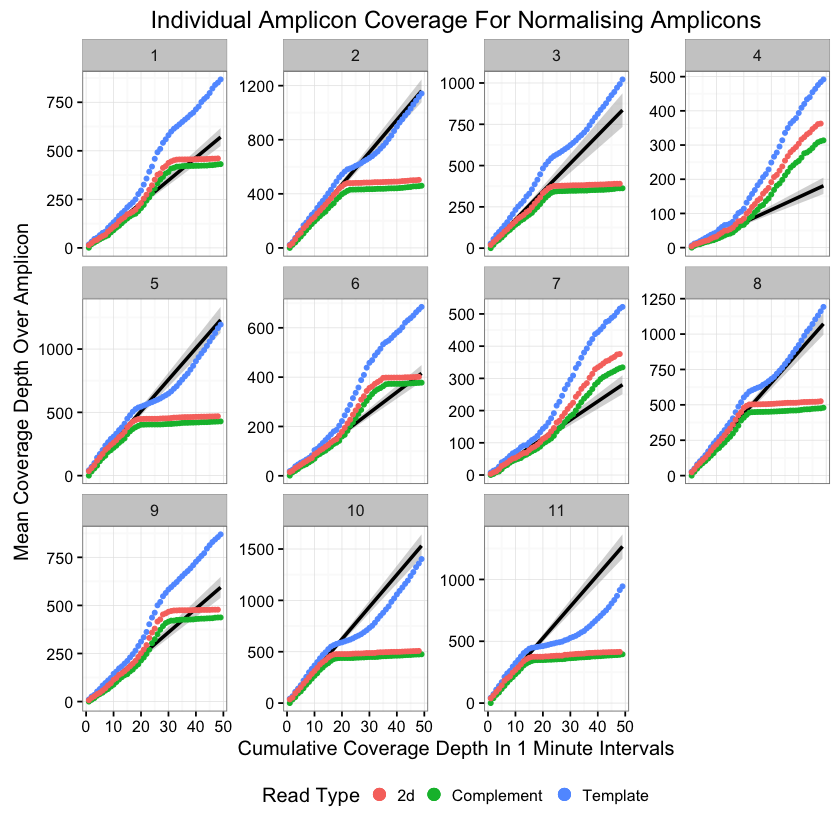

In [46]:
ggplot(data=ampliconstype[ampliconstype$Treatment=="Read Until",], aes(x=V4,y=MeanCoverage,color=Type)) + stat_smooth(data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$V4<=15,],method="lm",fullrange=TRUE, color="black") + geom_point(data=ampliconstype[ampliconstype$Type=="Template" & ampliconstype$Treatment=="Read Until",],size = 1) + geom_point(data=ampliconstype[ampliconstype$Type=="Complement"&ampliconstype$Treatment=="Read Until",],size = 1) + geom_point(data=ampliconstype[ampliconstype$Type=="2d"&ampliconstype$Treatment=="Read Until",],size = 1) + facet_wrap(~amplicon,scales="free_y") + theme_bw() + labs(title = "Individual Amplicon Coverage For Normalising Amplicons",x = "Cumulative Coverage Depth In 1 Minute Intervals", y = "Mean Coverage Depth Over Amplicon")  + scale_colour_discrete(name  = "Read Type") + theme(legend.position="bottom" , legend.key = element_blank() ) + guides(colour = guide_legend(override.aes = list(size=3)))

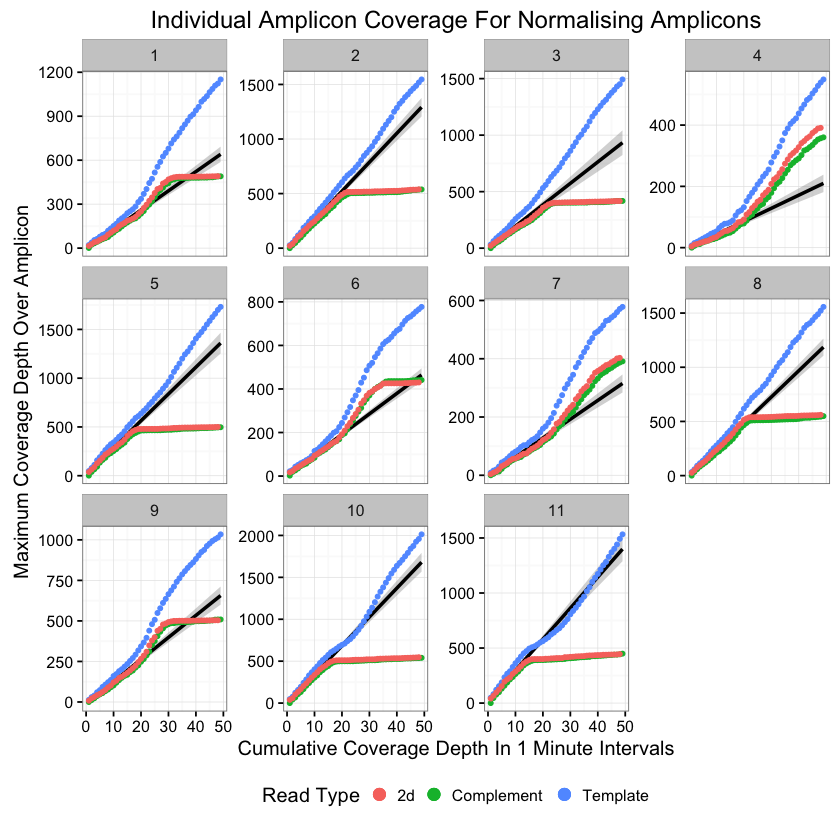

In [44]:
ggplot(data=ampliconstype[ampliconstype$Treatment=="Read Until",], aes(x=V4,y=MaxCoverage,color=Type)) + stat_smooth(data=ampliconstype[ampliconstype$Treatment=="Read Until" & ampliconstype$V4<=15,],method="lm",fullrange=TRUE, color="black") + geom_point(data=ampliconstype[ampliconstype$Type=="Template" & ampliconstype$Treatment=="Read Until",],size = 1) + geom_point(data=ampliconstype[ampliconstype$Type=="Complement"&ampliconstype$Treatment=="Read Until",],size = 1) + geom_point(data=ampliconstype[ampliconstype$Type=="2d"&ampliconstype$Treatment=="Read Until",],size = 1) + facet_wrap(~amplicon,scales="free_y") + theme_bw() + labs(title = "Individual Amplicon Coverage For Normalising Amplicons",x = "Cumulative Coverage Depth In 1 Minute Intervals", y = "Maximum Coverage Depth Over Amplicon")  + scale_colour_discrete(name  = "Read Type") + theme(legend.position="bottom" , legend.key = element_blank() ) + guides(colour = guide_legend(override.aes = list(size=3)))

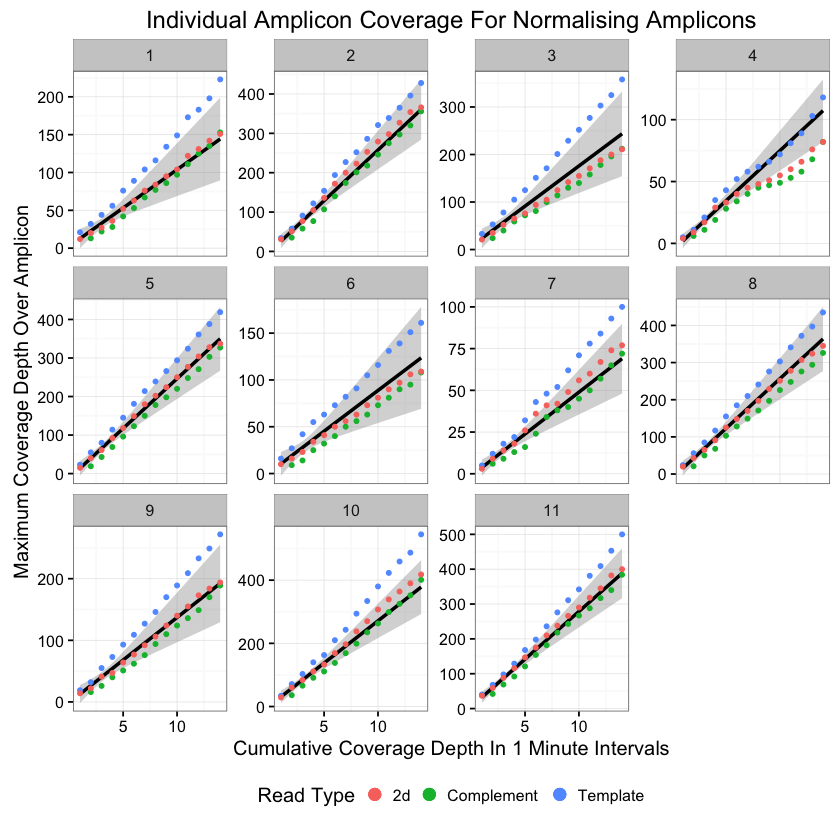

In [45]:
ggplot(data=ampliconstype[ampliconstype$Treatment=="Normal",], aes(x=V4,y=MaxCoverage,color=Type)) + stat_smooth(data=ampliconstype[ampliconstype$Treatment=="Normal" & ampliconstype$V4<=5,],method="lm",fullrange=TRUE, color="black") + geom_point(data=ampliconstype[ampliconstype$Type=="Template"&ampliconstype$Treatment=="Normal",],size = 1) + geom_point(data=ampliconstype[ampliconstype$Type=="Complement"&ampliconstype$Treatment=="Normal",],size = 1) + geom_point(data=ampliconstype[ampliconstype$Type=="2d"&ampliconstype$Treatment=="Normal",],size = 1) + facet_wrap(~amplicon,scales="free_y") + theme_bw() + labs(title = "Individual Amplicon Coverage For Normalising Amplicons",x = "Cumulative Coverage Depth In 1 Minute Intervals", y = "Maximum Coverage Depth Over Amplicon")  + scale_colour_discrete(name  = "Read Type") + theme(legend.position="bottom" , legend.key = element_blank() ) + guides(colour = guide_legend(override.aes = list(size=3)))